In [234]:
from keras import models
from keras import layers
import pandas as pd
import numpy as np


## Read Data 

Read the train and test data 

In [235]:
Train = pd.read_csv("train_digits.csv")
Test = pd.read_csv("test_digits.csv")

In [236]:
print(Train.shape)

(42000, 785)


In [237]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
#Read the labels into a seprate array
y_train = Train['label'].values

#convert the images into a matrix of size 42,000 X 28 X 28 
train_images = Train.loc[:,Train.columns != 'label'].values
train_images = train_images.reshape(42000,28,28)
train_images.shape


(42000, 28, 28)

In [239]:

#convert the images into a matrix of size 28,000 X 28 X 28 
test_images = Test.values
test_images_final = test_images.reshape(28000,28,28)
test_images_final.shape


(28000, 28, 28)

## Displaying an Example of a digit

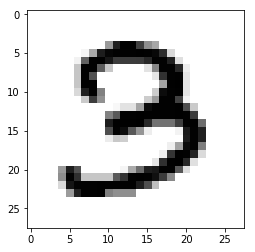

In [240]:
import matplotlib.pyplot as plt
digit = train_images[14]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

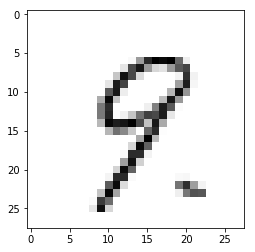

In [241]:
import matplotlib.pyplot as plt
digit = test_images_final[2]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Preparing the image data

In [242]:
train_images = train_images.reshape((42000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images_final = test_images_final.reshape((28000, 28 * 28))
test_images_final = test_images_final.astype('float32') / 255

## The network architecture

In [243]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## The compilation step

In [244]:
from keras import optimizers
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

## Spliting the Train data 

In [245]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.33)

## Preparing the labels

In [246]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


## Fit the Network

In [247]:
history = network.fit(X_train, train_labels, epochs=25, batch_size=128,validation_data=(X_test,test_labels))

Train on 28140 samples, validate on 13860 samples
Epoch 1/25
28140/28140 [==============================] - 2s 78us/step - loss: 0.3518 - acc: 0.8991 - val_loss: 0.2037 - val_acc: 0.9397
Epoch 2/25
28140/28140 [==============================] - 2s 69us/step - loss: 0.1537 - acc: 0.9568 - val_loss: 0.1420 - val_acc: 0.9570
Epoch 3/25
28140/28140 [==============================] - 2s 72us/step - loss: 0.1012 - acc: 0.9711 - val_loss: 0.1172 - val_acc: 0.9632
Epoch 4/25
28140/28140 [==============================] - 2s 72us/step - loss: 0.0720 - acc: 0.9790 - val_loss: 0.1234 - val_acc: 0.9629
Epoch 5/25
28140/28140 [==============================] - 2s 72us/step - loss: 0.0540 - acc: 0.9842 - val_loss: 0.0999 - val_acc: 0.9701
Epoch 6/25
28140/28140 [==============================] - 2s 71us/step - loss: 0.0386 - acc: 0.9887 - val_loss: 0.0957 - val_acc: 0.9718
Epoch 7/25
28140/28140 [==============================] - 2s 71us/step - loss: 0.0286 - acc: 0.9921 - val_loss: 0.1002 - val_acc

## Model Performances 

In [248]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('test_acc:', test_acc)

13860/13860 [==============================] - 1s 42us/step
test_acc: 0.9753246753246754


In [249]:
#Make Prediction
predict = network.predict(test_images_final)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict]

## Plotting the training and validation loss

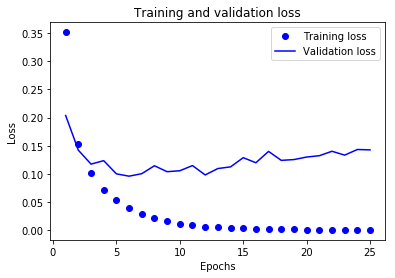

In [250]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(history_dict['loss'])+1)
#epochs = range(1, 36)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [252]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("digit6.csv",index=False)
